<a href="https://colab.research.google.com/github/npnavas/MAT_421/blob/main/MAT_421_HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20.1 Numerical Differentiation Problem Statement
Here since computers work with a discrete amount of data we cannot talk about functions on a continuous spectrum on $\mathbb{R}^n$ but rather we can talk about functions on a discrete grid. Here our goal is to approximate derivatives using the information from our discretized function. 

# 20.2 Finite Difference Approximating Derivatives
Recall that for $f:\mathbb{R}\mapsto\mathbb{R}$ that $$\frac{df}{dx}=\lim_{x\to x_0}\frac{f(x)-f(x_0)}{x-x_0}.$$
When we discretize this space we can get three types of approximation for the derivative as $x\to x_0$. In this case we'll have our current $x$ being $x_i$, the previous of $x$ being $x_{i-1}$ and the next value $x$ being $x_{i+1}$ These three approximations are

$$\text{Forward Difference: } \left.\frac{df}{dx}\right|_{x=x_i}=\frac{f\left(x_{i+1}\right)-f\left(x_{i}\right)}{x_{i+1}-x_i}$$

$$\text{Backward Difference: } \left.\frac{df}{dx}\right|_{x=x_i}=\frac{f\left(x_{i}\right)-f\left(x_{i-1}\right)}{x_{i}-x_{i-1}}$$

$$\text{Central Difference: }  \left.\frac{df}{dx}\right|_{x=x_i} = \frac{f(x_{i+1})-f(x_{i-1})}{ x_{i+1}-x_{i-1}}$$

Cleaning this up a bit let $h = x_{i+1}-x_i = x_i - x_{i-1}$, along with the Taylor expansion of $f(x)$ around $x_i$, we get

$$\text{Forward Difference: } \left.\frac{df}{dx}\right|_{x=x_i}=\frac{f\left(x_{i+1}\right)-f\left(x_{i}\right)}{h}+\mathcal{O}(h)$$

$$\text{Backward Difference: } \left.\frac{df}{dx}\right|_{x=x_i}=\frac{f\left(x_{i}\right)-f\left(x_{i-1}\right)}{h}+\mathcal{O}(h)$$

$$\text{Central Difference: }  \left.\frac{df}{dx}\right|_{x=x_i} = \frac{f(x_{i+1})-f(x_{i-1})}{2h}+\mathcal{O}(h^2),$$
where $\mathcal{O}(\epsilon)$ is the leading order error term in terms of it's input $\epsilon$. 

So far we have our best approximation to be the central difference which had leading order $+\mathcal{O}(h^2)$. We can improve this by using the following 
$$ \left.\frac{df}{dx}\right|_{x=x_i}= \frac{f(x_{i-2}) - 8f(x_{i-1}) + 8f(x_{i+1}) - f(x_{i+2})}{12h},$$
which when expanding $f(x)$ shows we get a leading order error of $\mathcal{O}(h^4)$. Below we can use python to verify these results. For the function $$f:\mathbb{R}\mapsto\mathbb{R},f(x)=e^{-x^2}$$ 

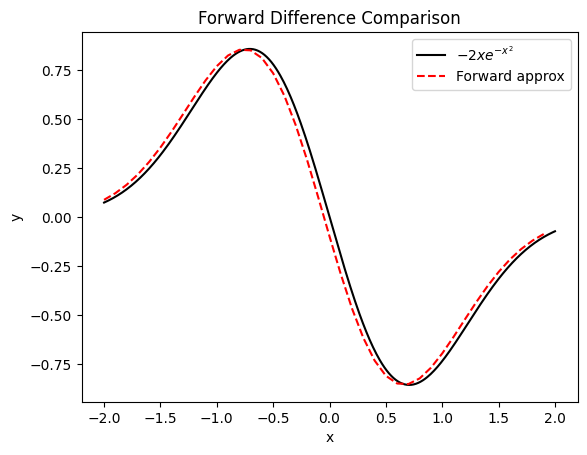

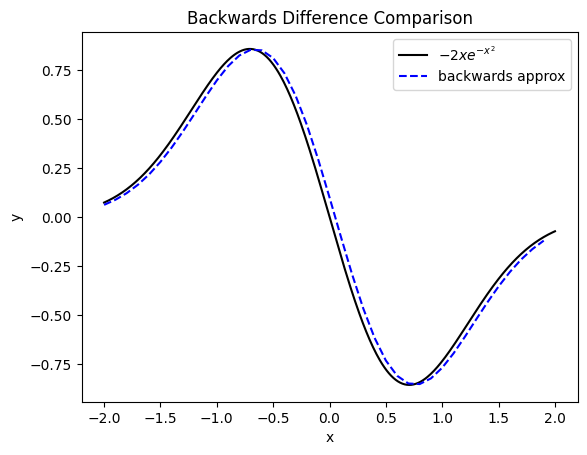

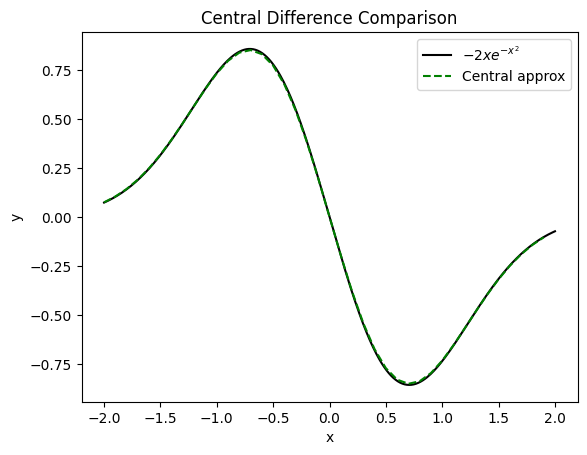

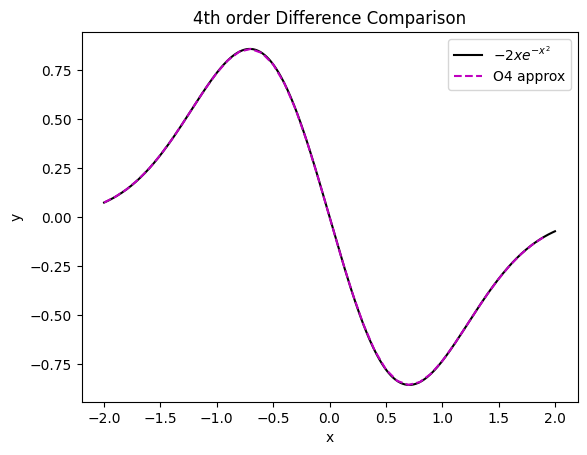

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
  return np.exp(-x**2)

def dfdx(x):
  return -2*x*np.exp(-x**2)

def Ndfdx(f, x, h, M = "O4"):
  '''
  M is a string it is to be used as a mode
  F: forward diff
  B: backward diff
  C: central diff
  O4: 4th order accurate derivative
  '''
  if M == "F":
    return (f(x+h) - f(x)) / h
  elif M == "B":
      return (f(x) - f(x-h)) / h
  elif M == "C":
    return (f(x+h) - f(x-h)) / (2*h)
  elif M == "O4":
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)) / (12*h)
  else:
    raise NotImplementedError 

## PARAMETERS ##
h = 0.1
x = np.arange(-2,2,h)
xx = np.linspace(-2,2,400)

## PLOTTING ##
plt.figure()
plt.title("Forward Difference Comparison")
plt.plot(xx, dfdx(xx),"k-", label = r"$-2xe^{-x^2}$")
plt.plot(x, Ndfdx(f, x, h, "F"), "r--", label = "Forward approx")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.figure()
plt.title("Backwards Difference Comparison")
plt.plot(xx, dfdx(xx),"k-", label = r"$-2xe^{-x^2}$")
plt.plot(x, Ndfdx(f, x, h, "B"), "b--", label = "backwards approx")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.figure()
plt.title("Central Difference Comparison")
plt.plot(xx, dfdx(xx),"k-", label = r"$-2xe^{-x^2}$")
plt.plot(x, Ndfdx(f, x, h, "C"), "g--", label = "Central approx")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.figure()
plt.title("4th order Difference Comparison")
plt.plot(xx, dfdx(xx),"k-", label = r"$-2xe^{-x^2}$")
plt.plot(x, Ndfdx(f, x, h, "O4"), "m--", label = "O4 approx")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


# 20.3 Approximating of Higher Order Derivatives
Say that you want to find the second derivative of a function numerically. Our current method only handles a single derivative. To combat this let's consider the following two Taylor expansions of $f(x)$

$$f(x_{i+1}) = f(x_i) + hf'(x_i) + \frac{h^2}{2}f''(x_i)+\frac{h^2}{3!}f'''(x_i)+\cdots$$
and
$$f(x_{i-1}) = f(x_i) - hf'(x_i) + \frac{h^2}{2}f''(x_i)-\frac{h^2}{3!}f'''(x_i)+\cdots$$

Adding these two equations together we get that 
$$f(x_{i+1}) + f(x_{i-1}) = 2f(x_i) + h^2f''(x_i)+\mathcal{O}\left(h^4\right)$$
Rearranging this we get
$$f''(x_i) = \frac{f(x_{i+1}) + f(x_{i-1}) - 2f(x_i)}{h^2}+\mathcal{O}\left(h^2\right)$$

Let's verify this using the same function as above.

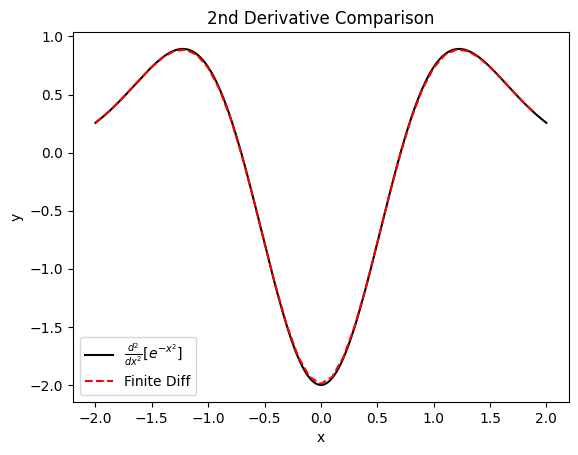

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
  return np.exp(-x**2)

def d2fdx(x):
  return 4*(x**2)*f(x)-2*f(x)

def Nd2fdx(f, x, h):
  return (f(x+h) + f(x-h) - 2*f(x))/(h**2)

## PARAMETERS ##
h = 0.1
x = np.arange(-2,2,h)
xx = np.linspace(-2,2,400)

## PLOTTING ##
plt.figure()
plt.title("2nd Derivative Comparison")
plt.plot(xx, d2fdx(xx),"k-", label = r"$\frac{d^2}{dx^2}\left[e^{-x^2}\right]$")
plt.plot(x, Nd2fdx(f, x, h), "r--", label = "Finite Diff")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# 20.4 Numerical Differentiation with Noise
In the real world our data usually isn't as mathematically perfect as we'd like it to be. When this happens we've introduced "noise" into our data For instance when analysing a signal or when inputting measurments our data is most often not going to be perfect. As we'll see that when you try doing our numerical methods for differentiation noise will be amplified by the differentiation. In this case we'll use
$$g(x) = f(x)+\epsilon\sin(\omega x)$$


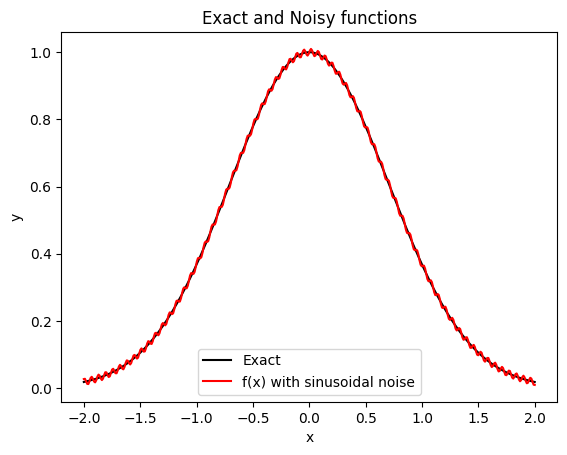

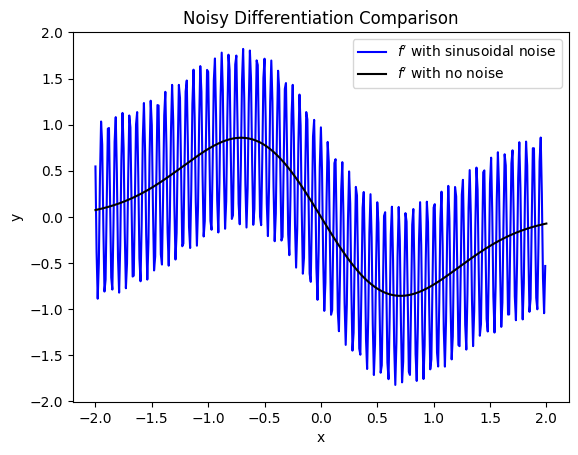

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
  return np.exp(-x**2)

def g(x, e = 0.01, w = 100, M = "S"):
  if M == "N":
    return f(x) + np.random.random_sample()
  elif M == "S":
    return f(x) + e*np.sin(w*x)

def dfdx(x):
  return -2*x*np.exp(-x**2)

def Ndfdx(f, x, h, M = "O4"):
  '''
  M is a string it is to be used as a mode
  F: forward diff
  B: backward diff
  C: central diff
  O4: 4th order accurate derivative
  '''
  if M == "F":
    return (f(x+h) - f(x)) / h
  elif M == "B":
      return (f(x) - f(x-h)) / h
  elif M == "C":
    return (f(x+h) - f(x-h)) / (2*h)
  elif M == "O4":
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)) / (12*h)
  else:
    raise NotImplementedError 


## PARAMETERS ##
h = 0.01
x = np.arange(-2,2,h)
xx = np.linspace(-2,2,400)

## PLOTTING ##f_with_noise(f, x, e = 0.01, w = 100, M = "N")

plt.figure()
plt.title("Exact and Noisy functions")
plt.plot(xx, f(xx),"k-", label = r"Exact")
plt.plot(xx, g(xx, e = 0.01, w = 100, M = "S"), "r-", label = "f(x) with sinusoidal noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.figure()
plt.title("Noisy Differentiation Comparison")
plt.plot(x,(g(x-2*h) - 8*g(x-h) + 8*g(x+h) - g(x+2*h)) / (12*h), "b-", label = r"$f'$ with sinusoidal noise")
plt.plot(xx, dfdx(xx),"k-", label = r"$f'$ with no noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()